In [1]:
import sqlite3
import pandas as pd

In [2]:
# Connect to SQLite database (if  don't have one, it'll be created)
conn = sqlite3.connect('superstore.db')

In [8]:
# Load the CSV into pandas (assuming the CSV is named 'Superstore_Sales.csv')
df = pd.read_csv('C:/Users/baner/Downloads/superstore.csv')
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
# Save the dataframe into the SQLite database
df.to_sql('Orders', conn, if_exists='replace', index=False)

9800

In [10]:
# Check the first few rows to ensure data is loaded
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
!pip install sqlalchemy

  Using cached sqlalchemy-2.0.43-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 1.2 MB/s eta 0:00:02
   -------------- ------------------------- 0.8/2.1 MB 1.2 MB/s eta 0:00:02
   ------------------- -------------------- 1.0/2.1 MB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 1.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 1.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 1.2 MB/s  0:00:01

   ---------------------------------------- 0/2 [greenlet]
   ---------------------------------------- 0/2 [gr

In [12]:
#connect to the SQLite database and run queries.

from sqlalchemy import create_engine

# Connect to the SQLite database
engine = create_engine('sqlite:///superstore.db')

# Write the SQL query (Total Sales by Category, by Month)
query = """
SELECT 
    strftime('%Y', OrderDate) AS Year,
    strftime('%m', OrderDate) AS Month,
    Category,
    SUM(Sales) AS Total_Sales
FROM Orders
GROUP BY Year, Month, Category
ORDER BY Year, Month, Category;
"""

# Run the SQL query and store the results in a pandas DataFrame
df_sales_by_category = pd.read_sql(query, engine)

# Check the first few rows
df_sales_by_category.head()

,Year,Month,Category,Total_Sales
0,None,None,Furniture,728658.5757
1,None,None,Office Supplies,705422.3340
2,None,None,Technology,827455.8730


In [14]:
# Write the SQL query for top 5 customers by total sales
query = """
SELECT 
    CustomerID,
    SUM(Sales) AS Total_Sales
FROM Orders
GROUP BY CustomerID
ORDER BY Total_Sales DESC
LIMIT 5;
"""

C:\Users\baner\AppData\Local\Temp\ipykernel_9352\643636039.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='Total_Sales', data=df_top_customers, palette='viridis')


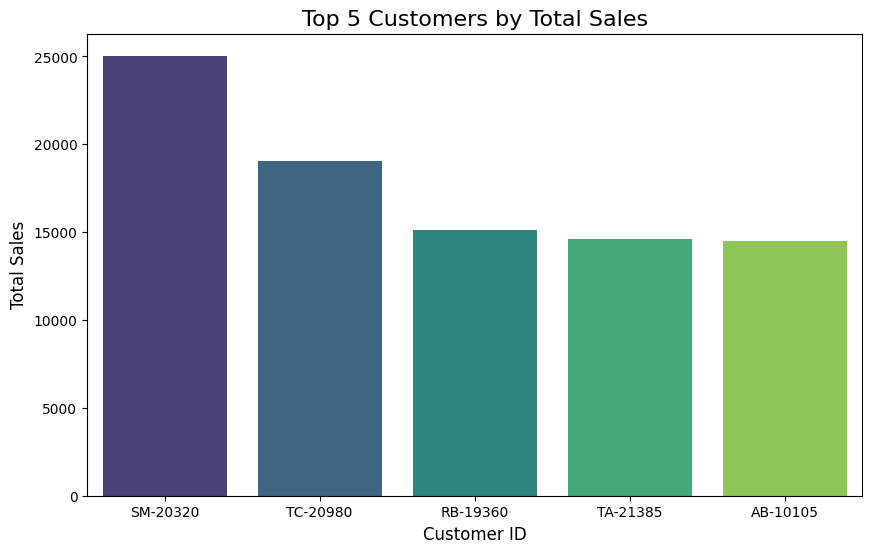

In [15]:
# Run the query and get the results
df_top_customers = pd.read_sql(query, engine)

# Visualize the top customers with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='Total_Sales', data=df_top_customers, palette='viridis')

# Title and labels
plt.title('Top 5 Customers by Total Sales', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Show the plot
plt.show()